Ejercicio integrador para clase: Análisis y clasificación con dataset Iris.

Parte 1: Clasificación supervisada

In [ ]:
#1. Importar las librerías necesarias

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [78]:
# 1. Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

In [79]:
# 2. Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [80]:
# 3a. Modelo de Árbol de Decisión
modelo_arbol = DecisionTreeClassifier(random_state=42)
modelo_arbol.fit(X_train, y_train)
y_pred_arbol = modelo_arbol.predict(X_test)
accuracy_arbol = accuracy_score(y_test, y_pred_arbol)

# 3b. Modelo Random Forest (100 árboles)
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# 3c. Modelo SVM con kernel RBF
svm_modelo = SVC(kernel="rbf", random_state=42)
svm_modelo.fit(X_train, y_train)
y_pred_svm = svm_modelo.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)


In [81]:
# 4. Calcula y muestra la precisión de cada modelo
print("- Precisión del Árbol de Decisión:", accuracy_arbol)
print("- Precisión del Random Forest:", accuracy_rf)
print("- Precisión del SVM con kernel RBF:", accuracy_svm)

- Precisión del Árbol de Decisión: 1.0
- Precisión del Random Forest: 1.0
- Precisión del SVM con kernel RBF: 1.0


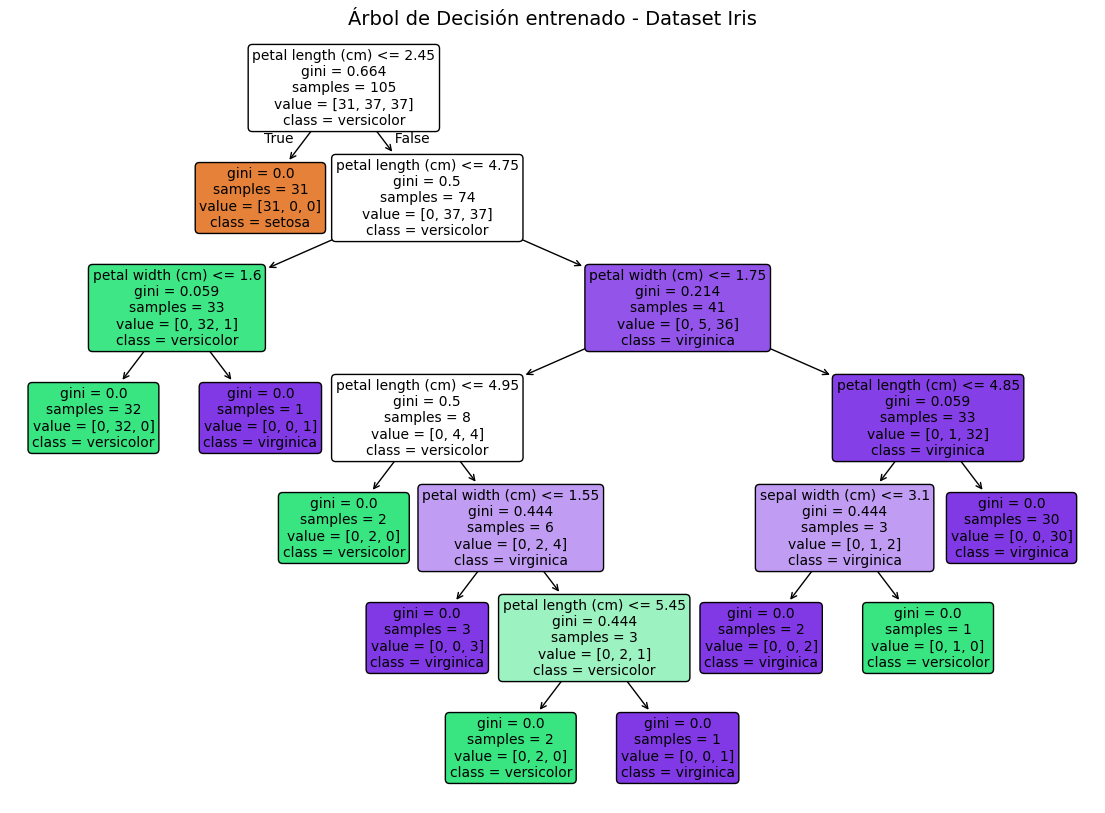

In [82]:
# 5. Visualizar el árbol de decisión
plt.figure(figsize=(14, 10))
plot_tree(
    modelo_arbol,
    filled=True, 
    rounded=True,  
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    fontsize=10  
)
plt.title("Árbol de Decisión entrenado - Dataset Iris", fontsize=14)
plt.show()

Parte 2. Clustering no supervisado

In [83]:
#Importar las librerías necesarias
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import seaborn as sns
import pandas as pd

In [84]:

#1. Cargar dataset y usar solo las dos primeras características
iris = load_iris()
X = iris.data[:, :2]  
y_real = iris.target 

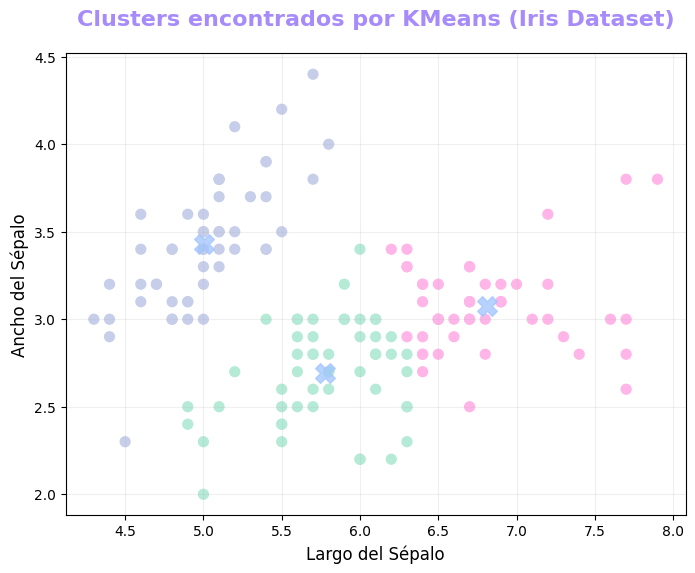

In [85]:
#2. Aplica K-Means para encontrar 3 clusters. Visualiza los clusters y sus centroides.

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pastel_colors = ['#FFB5E8', '#B5EAD7', '#C7CEEA']
cmap_pastel = ListedColormap(pastel_colors)

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap_pastel, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='#A0C4FF', s=200, alpha=0.75, marker='X') 
plt.title("Clusters encontrados por KMeans (Iris Dataset)", fontsize=16, fontweight='bold', color='#A78BFA', pad=20)
plt.xlabel("Largo del Sépalo", fontsize=12)
plt.ylabel("Ancho del Sépalo", fontsize=12)
plt.grid(alpha=0.2)
plt.show()

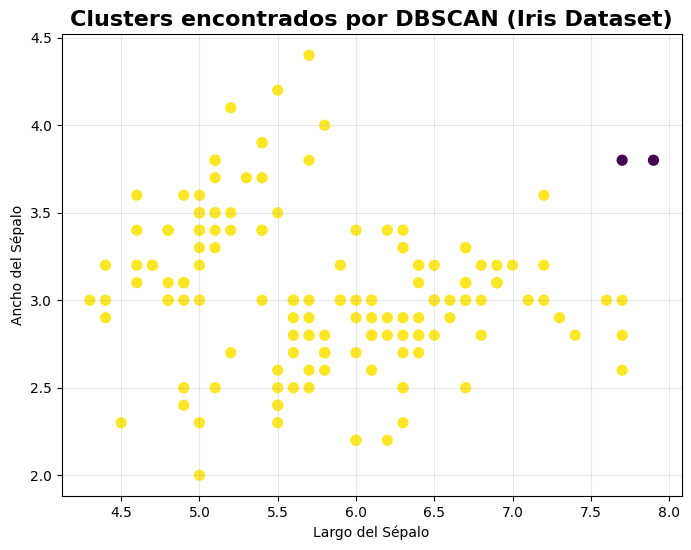

In [86]:
#3. Aplica DBSCAN con eps=0.5 y min_samples=5. Visualiza los clusters y los puntos etiquetados como ruido.
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# Visualizar resultados con cmap 'viridis'
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan, cmap='viridis', s=50)
plt.title("Clusters encontrados por DBSCAN (Iris Dataset)", fontsize=16, fontweight='bold')
plt.xlabel("Largo del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.grid(True, alpha=0.3)
plt.show()

In [87]:
# Comparar clusters con etiquetas reales usando ARI Y NMI 

print("Comparación de etiquetas reales con KMeans:")
print(f"ARI: {adjusted_rand_score(y_real, labels):.2f}")
print(f"NMI: {normalized_mutual_info_score(y_real, labels):.2f}")

print("\nComparación de etiquetas reales con DBSCAN:")
print(f"ARI: {adjusted_rand_score(y_real, labels_dbscan):.2f}")
print(f"NMI: {normalized_mutual_info_score(y_real, labels_dbscan):.2f}")

Comparación de etiquetas reales con KMeans:
ARI: 0.60
NMI: 0.65

Comparación de etiquetas reales con DBSCAN:
ARI: 0.00
NMI: 0.03


- Interpretación resultados de ARI y NMI:

Con KMeans, los resultados mostraron que los grupos que encontró se parecen bastante a las clases reales del dataset. No son perfectos, pero hay una buena coincidencia, lo que tiene sentido porque KMeans intenta dividir los datos en grupos bien definidos y aquí funciona bastante bien.

En cambio, con DBSCAN los resultados fueron muy bajos, casi no se parecen a las etiquetas reales. Eso pasa porque DBSCAN busca grupos basados en densidad y puede marcar muchos puntos como ruido o formar grupos que no coinciden con las especies. Además, con los parámetros que usamos y solo dos características, DBSCAN no logra identificar bien los grupos que estamos buscando.

Entonces, en este caso KMeans es mejor para encontrar los clusters, pero DBSCAN puede ser útil cuando queremos detectar ruido o clusters con formas más irregulares en otros tipos de datos.

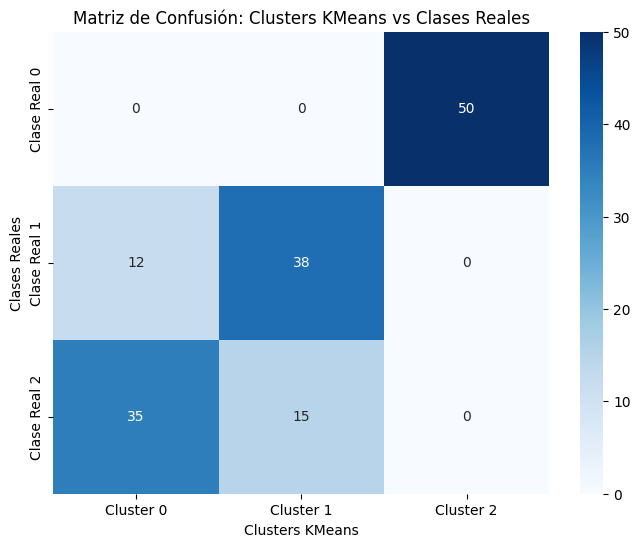

In [88]:
# Matriz de confusión entre etiquetas reales y clusters KMeans
matriz = confusion_matrix(y_real, labels)

# Crear DataFrame para mejor visualización con seaborn
df_confusion = pd.DataFrame(
    matriz,
    index=[f"Clase Real {i}" for i in range(len(set(y_real)))],
    columns=[f"Cluster {i}" for i in range(len(set(labels)))]
)

# Graficar matriz de confusión con heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df_confusion, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión: Clusters KMeans vs Clases Reales")
plt.ylabel("Clases Reales")
plt.xlabel("Clusters KMeans")
plt.show()

Preguntas para discusión:

- ¿Cuál modelo supervisado tuvo mejor precisión? ¿Por qué?
En este ejercicio en particular todos los modelos tuvieron una precisión de 100%, pero generalmente Random Forest suele tener mejor precisión ante los demás modelos (un solo árbol o SVM) ya que combina múltiples árboles y no depende de uno solo, y ayuda a que la variabilidad de los datos no afecte los resultados.

- ¿Cómo se relacionan los clusters de K-Means con las clases reales?
Los clusters que encontró KMeans normalmente pueden parecerse a las clases reales, ya que el agrupa los datos por su cercanía en cuanto a las características, el que estén cerca hace que puedan pertenecer al mismo cluster, y usualmente esto coincide con las categorías reales, pero no siempre son iguales o exactos ya que KMeans solo mira la distancia entre los puntos, pero puede no ser cierto para todas las clases reales. En general hizo una buena agrupación de las flores según sus características.

- ¿Qué utilidad tiene DBSCAN en comparación con KMeans?
DBSCAN es útil en los casos que se necesita encontrar grupos con formas más irregulares y también es util encontrando e identificando puntos que no pertenecen a ningún grupo. KMeans siempre hace la cantidad de grupos que se le indiquen, y no detecta valores atípicos o ruido, entonces en algún caso que necesitemos ver algunos datos con ruido sería más util DBSCAN.

- ¿Qué ventajas y desventajas tiene un árbol de decisión frente a un Random Forest?
Un árbol es funcional y fácil de entender además de visualizar, pero puede tener equivocaciones si los datos cambian o son datos muy complejos. Lo bueno de Random Forest es que al juntar muchos árboles de decisión, hace que sea mucho más preciso en cuanto a los resultados y el margen de error es menor.

- ¿Cómo ayuda la visualización del árbol para interpretar el modelo?
El poder visualizar el árbol nos ayuda a poder entender como se toman las decisiones del modelo, da la facilidad de saber que cosas son importantes y poder explicarlo a otras personas, al tener una guía visual de los resultados y las predicciones.

Bonus experimentos:

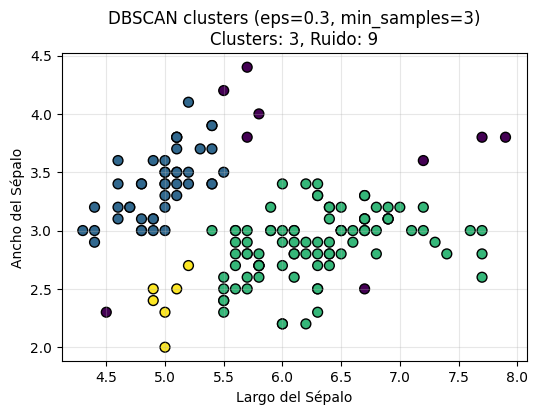

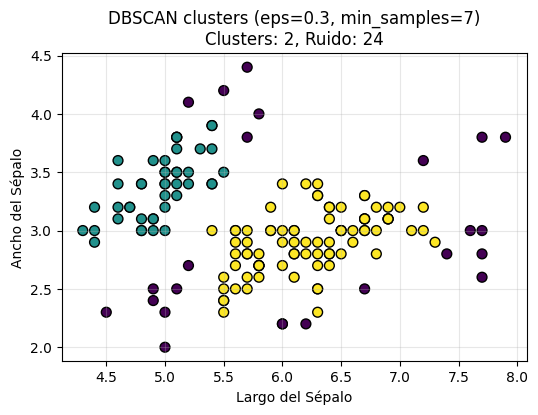

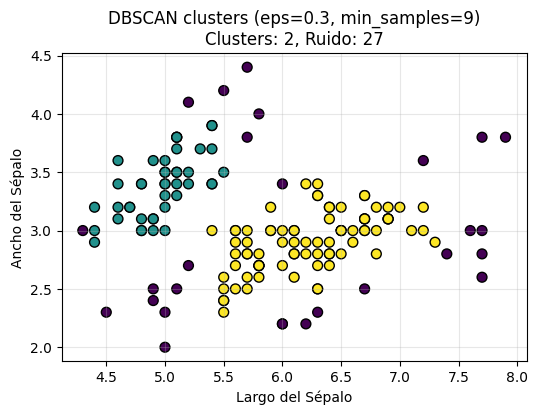

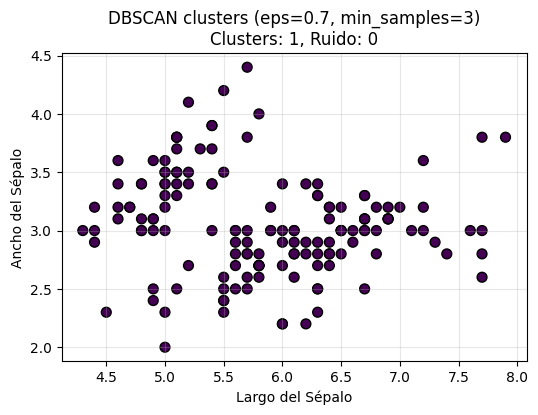

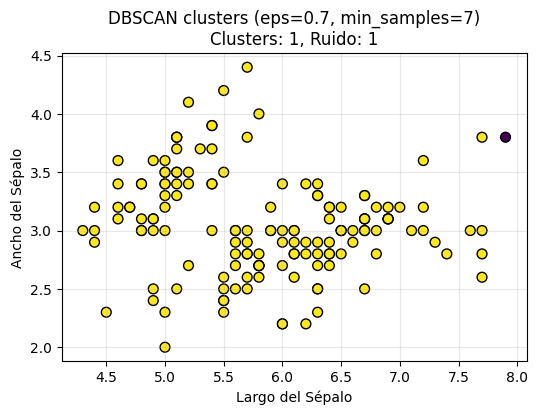

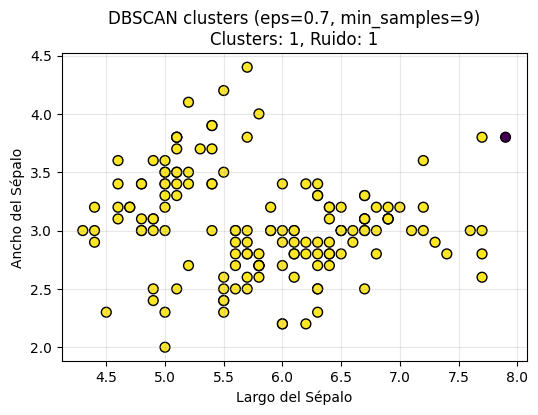

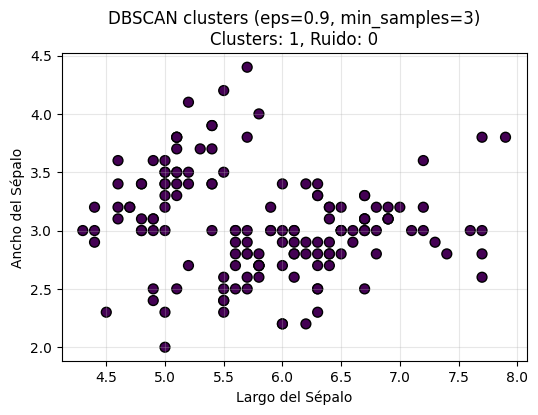

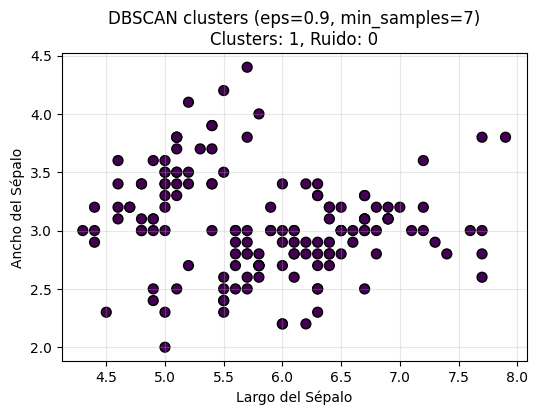

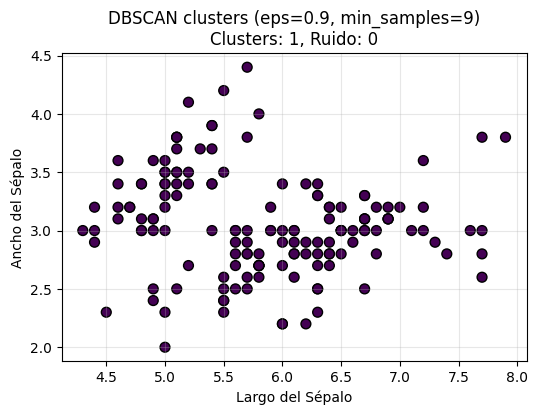

In [89]:
#1. Experimentar con diferentes eps y min_samples en DBSCAN

eps_values = [0.3, 0.7, 0.9]
min_samples_values = [3, 7, 9]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        plt.figure(figsize=(6, 4))
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, edgecolors='k')
        plt.title(f'DBSCAN clusters (eps={eps}, min_samples={min_samples})\nClusters: {n_clusters}, Ruido: {n_noise}')
        plt.xlabel('Largo del Sépalo')
        plt.ylabel('Ancho del Sépalo')
        plt.grid(True, alpha=0.3)
        plt.show()

In [90]:
#2. Cambiar el kernel de SVM a linear y comparar resultados

# Datos originales (solo 2 características para visualización rápida)
X = iris.data[:, :2]
y = iris.target

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# SVM con kernel linear
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print(f"Accuracy SVM kernel linear: {accuracy_linear:.2f}")

# Puedes comparar con kernel='rbf' si quieres
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy SVM kernel rbf: {accuracy_rbf:.2f}")

Accuracy SVM kernel linear: 0.80
Accuracy SVM kernel rbf: 0.80


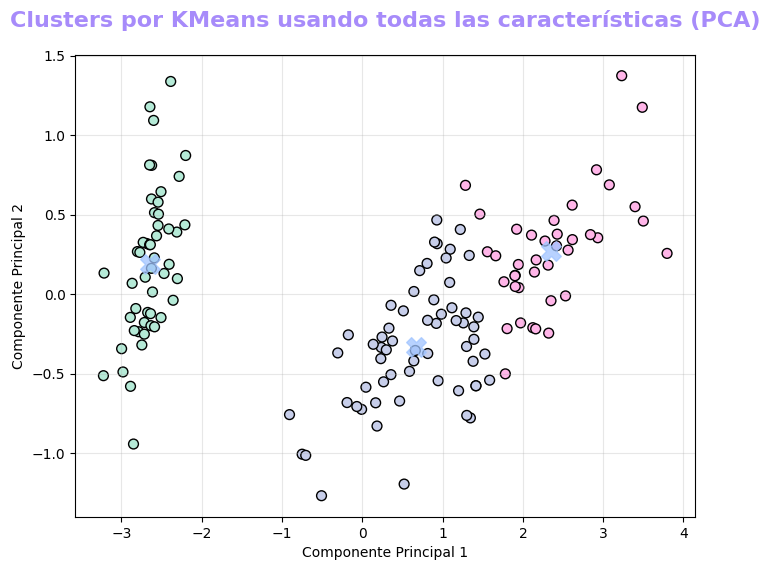

ARI (todas las características): 0.72
NMI (todas las características): 0.74


In [ ]:
#3. Usar todas las características para clustering con KMeans y comparar

# 1. Cargar datos completos
iris = load_iris()
X_full = iris.data
y_real = iris.target

# 2. KMEANS con todas las características
kmeans_full = KMeans(n_clusters=3, random_state=42)
kmeans_full.fit(X_full)
labels_full = kmeans_full.labels_

# 3. PCA para visualizar en 2D (al tener 4 datos del dataset IRIS se usa Principal component analysis para poderlo visualizar)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_full)
centroids_pca = pca.transform(kmeans_full.cluster_centers_)

pastel_colors = ['#FFB5E8', '#B5EAD7', '#C7CEEA']  # rosa, verde, lila
cmap_pastel = ListedColormap(pastel_colors)

# 5. Visualizar
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_full, cmap=cmap_pastel, s=50, edgecolors='k')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='#A0C4FF', s=200, alpha=0.75, marker='X')  # azul claro para centroides
plt.title("Clusters por KMeans usando todas las características (PCA)", fontsize=16, fontweight='bold', color='#A78BFA', pad=20)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True, alpha=0.3)
plt.show()

# 6. Comparar con etiquetas reales
ari_full = adjusted_rand_score(y_real, labels_full)
nmi_full = normalized_mutual_info_score(y_real, labels_full)

print(f"ARI (todas las características): {ari_full:.2f}")
print(f"NMI (todas las características): {nmi_full:.2f}")
